# Часть 2

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

Данные: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [2]:
df = pd.read_csv('train.csv')

column_data = df['GrLivArea']

desc = sm.stats.DescrStatsW(column_data)

mean = desc.mean
std_dev = desc.std
variance = desc.var
median = np.median(column_data)
Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1
data_range = column_data.max() - column_data.min()

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
num_outliers = len(outliers)
percent_outliers = (num_outliers / len(column_data)) * 100

print(f"Среднее: {mean:.2f}")
print(f"Медиана: {median:.2f}")
print(f"Первый квартиль (Q1): {Q1:.2f}")
print(f"Третий квартиль (Q3): {Q3:.2f}")
print(f"Межквартильный интервал (IQR): {IQR:.2f}")
print(f"Размах: {data_range:.2f}")
print(f"Дисперсия: {variance:.2f}")
print(f"Стандартное отклонение: {std_dev:.2f}")
print(f"Количество аномалий: {num_outliers}")
print(f"Процент аномалий: {percent_outliers:.2f}%")

Среднее: 1515.46
Медиана: 1464.00
Первый квартиль (Q1): 1129.50
Третий квартиль (Q3): 1776.75
Межквартильный интервал (IQR): 647.25
Размах: 5308.00
Дисперсия: 275940.50
Стандартное отклонение: 525.30
Количество аномалий: 31
Процент аномалий: 2.12%


In [3]:
# Выбросы

z_scores = stats.zscore(column_data)
threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)
print("Значения выбросов:", column_data.iloc[outliers])

Значения выбросов: 118     3222
185     3608
197     3112
304     3493
496     3228
523     4676
608     3194
635     3395
691     4316
769     3279
798     3140
1169    3627
1182    4476
1268    3447
1298    5642
1353    3238
Name: GrLivArea, dtype: int64


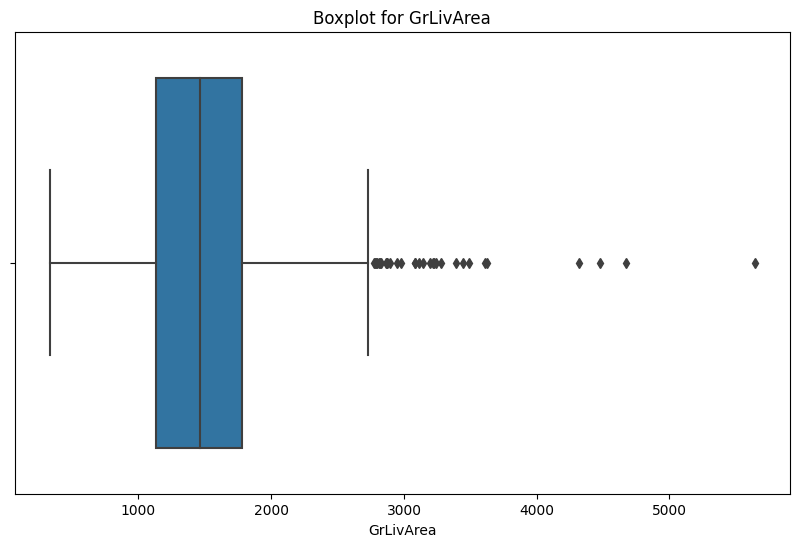

Количество обнаруженных выбросов: 31
      GrLivArea  SalePrice
58         2945     438780
118        3222     320000
185        3608     475000
197        3112     235000
231        2794     403000
304        3493     295000
324        2978     242000
496        3228     430000
523        4676     184750
583        2775     325000
608        3194     359100
635        3395     200000
691        4316     755000
769        3279     538000
798        3140     485000
803        2822     582933
961        2872     272000
1024       2898     287000
1031       3082     197000
1046       2868     556581
1142       2828     424870
1169       3627     625000
1173       3086     200500
1175       2872     285000
1182       4476     745000
1268       3447     381000
1298       5642     160000
1312       2810     302000
1328       2792     256000
1353       3238     410000
1386       2784     250000
Коэффициент корреляции между GrLivArea и SalePrice:
           GrLivArea  SalePrice
GrLivArea   1.0

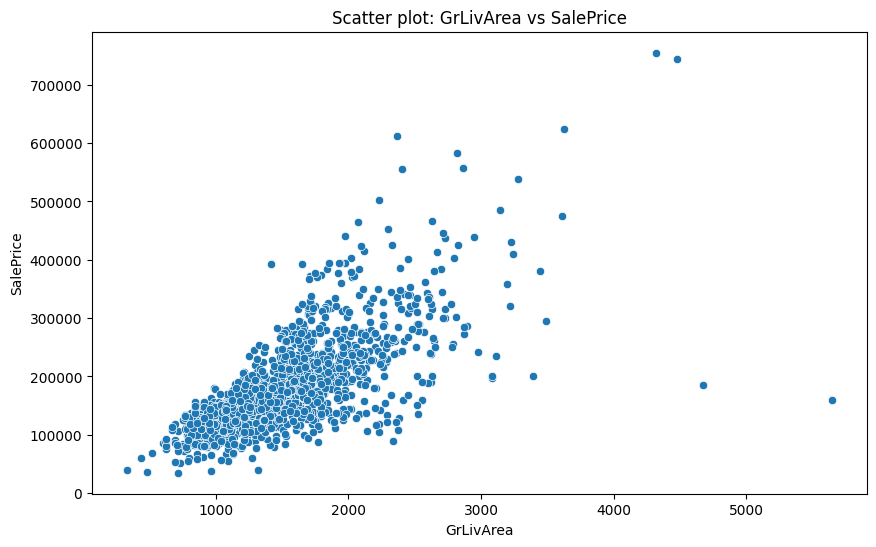

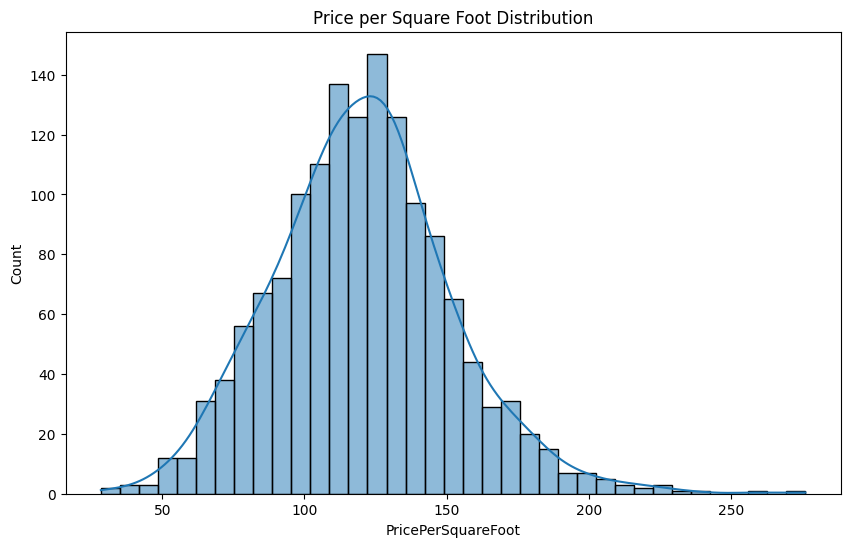

Корреляция между PricePerSquareFoot и SalePrice:
                    PricePerSquareFoot  SalePrice
PricePerSquareFoot            1.000000   0.575505
SalePrice                     0.575505   1.000000


In [4]:
# Анализируем колонку с общей жилой площадью
target_column = 'GrLivArea'

# Построение диаграммы размаха для выбранной колонки
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[target_column])
plt.title(f'Boxplot for {target_column}')
plt.show()

# Расчет межквартильного размаха и определение выбросов
q1 = df[target_column].quantile(0.25)
q3 = df[target_column].quantile(0.75)
iqr = q3 - q1

# Границы для определения выбросов
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Отбор строк, содержащих выбросы
outlier_rows = df[(df[target_column] < lower_limit) | (df[target_column] > upper_limit)]
print(f"Количество обнаруженных выбросов: {len(outlier_rows)}")
print(outlier_rows[[target_column, 'SalePrice']])

# Гипотеза: слишком высокие или низкие значения GrLivArea могут влиять на цену дома.
# Например, большие площади могут ассоциироваться с низкими ценами из-за состояния дома или его расположения.

# Анализируем связь между GrLivArea и SalePrice
correlation_matrix = df[[target_column, 'SalePrice']].corr()
print("Коэффициент корреляции между GrLivArea и SalePrice:")
print(correlation_matrix)

# Визуализация взаимосвязи через диаграмму рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[target_column], y=df['SalePrice'])
plt.title(f'Scatter plot: {target_column} vs SalePrice')
plt.show()

# Проверка возможности создания нового признака
# Создаем дополнительный показатель: стоимость квадратного метра
df['PricePerSquareFoot'] = df['SalePrice'] / df['GrLivArea']

# Анализ распределения нового признака
plt.figure(figsize=(10, 6))
sns.histplot(df['PricePerSquareFoot'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

# Оценка корреляции нового признака с ценой продажи
print("Корреляция между PricePerSquareFoot и SalePrice:")
print(df[['PricePerSquareFoot', 'SalePrice']].corr())

Диаграмма размаха для GrLivArea: Построенный график демонстрирует, что большинство значений жилой площади укладываются в определённый диапазон, однако существуют экстремально высокие значения, превышающие 4000 квадратных футов. Эти аномальные данные могут быть следствием специфических особенностей объектов, требующих более детального изучения.

Диаграмма рассеяния GrLivArea и SalePrice: На графике видна положительная связь между размером жилой площади и стоимостью дома: увеличение площади в большинстве случаев сопровождается ростом цены. Тем не менее, наблюдаются случаи, когда дома с очень большой площадью не имеют высокой стоимости. Это может быть связано с их состоянием или местоположением в менее привлекательных районах.

Гипотеза: Дома с большой жилой площадью (выше 4000 кв. футов), которые имеют непропорционально низкую цену, могут находиться в плохом состоянии или в менее престижных районах, что и объясняет такую низкую цену.

Распределение нового признака PricePerSqFt: При расчёте нового признака – стоимости квадратного фута – его распределение оказалось близким к нормальному. Данный показатель позволяет лучше понять, насколько эффективно используется жилое пространство дома. Умеренная связь этого признака с общей ценой указывает на то, что он может служить дополнительным инструментом анализа. Однако для больших домов стоимость квадратного фута может быть снижена, что, вероятно, связано с другими характеристиками, такими как возраст или необходимость ремонта.

Итог: Добавление нового признака (PricePerSqFt) позволяет углубить понимание факторов, влияющих на стоимость домов. Это особенно полезно для выявления объектов, не соответствующих общей тенденции, что может быть полезным при оценке недвижимости или разработке прогнозных моделей.